In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 读取winemag-data-130k-v2表中的数据

In [4]:
winemag_data_130k_v2 = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv",index_col=0)
winemag_data_130k_v2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 数据总览
- country:这个葡萄酒来自哪个国家
- description:对于这个葡萄酒的描述
- designation:酒厂中的葡萄园
- points:对葡萄酒的评分
- price:酒的价格
- province:葡萄酒产于哪个的省/州
- region_1:生产葡萄酒的省/州
- taster_name:品酒师的名字
- taster_twitter_handle:品酒师的twitter
- region_2:生产葡萄酒更加特定的区域
- title 评论文章的标题
- variety:酿造葡萄酒的葡萄种类
- winery:酿酒厂

In [5]:
winemag_data_130k_v2 = winemag_data_130k_v2.drop(columns=['description'],axis=1)
winemag_data_130k_v2

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### 标称属性频数统计

In [7]:
#country统计
data_country = winemag_data_130k_v2.iloc[:,0]

In [8]:
#进行频数统计
data_country_count = data_country.value_counts()
data_country_count

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

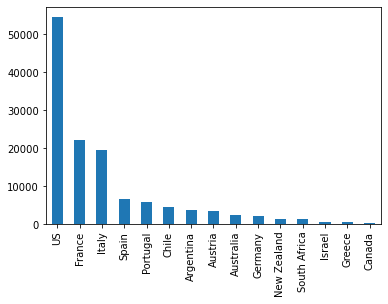

In [10]:
#统计出现频率前15的数据,并可视化
data_country_count.head(15).plot.bar()

Reserve                           2009
Estate                            1322
Reserva                           1259
Riserva                            698
Estate Grown                       621
                                  ... 
Par La Mer                           1
D'Ó                                  1
Whitie's D9 A Big Bold               1
A la Reine                           1
Viña El Recreo Single Vineyard       1
Name: designation, Length: 37979, dtype: int64


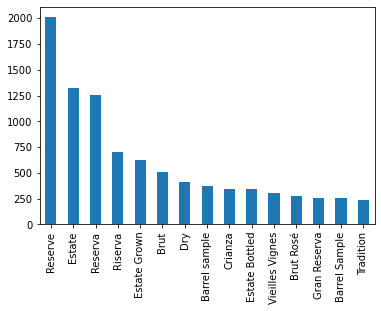

In [12]:
#designation统计
data_designation = winemag_data_130k_v2.iloc[:,1].dropna()
#进行频数统计
designation_count = data_designation.value_counts()
print(designation_count)
#统计出现频率前15的数据,并可视化
designation_count.head(15).plot.bar()

California       36247
Washington        8639
Bordeaux          5941
Tuscany           5897
Oregon            5373
                 ...  
Ticino               1
Table wine           1
Canada Other         1
Vinho da Mesa        1
Pocerina             1
Name: province, Length: 425, dtype: int64


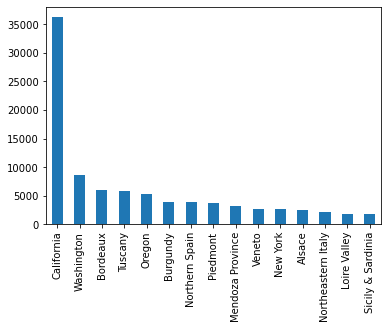

In [13]:
#province统计
data_province = winemag_data_130k_v2.iloc[:,4].dropna()
#进行频数统计
province_count = data_province.value_counts()
print(province_count)
#统计出现频率前15的数据,并可视化
province_count.head(15).plot.bar()

Napa Valley             4480
Columbia Valley (WA)    4124
Russian River Valley    3091
California              2629
Paso Robles             2350
                        ... 
Arribes del Duero          1
Goulburn Valley            1
Jujuy                      1
Aleatico dell'Elba         1
Chignin-Bergeron           1
Name: region_1, Length: 1229, dtype: int64


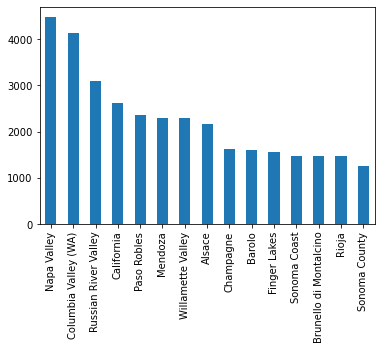

In [14]:
#region_1统计
data_region_1 = winemag_data_130k_v2.iloc[:,5].dropna()
#进行频数统计
region_1_count = data_region_1.value_counts()
print(region_1_count)
#统计出现频率前15的数据,并可视化
region_1_count.head(15).plot.bar()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64


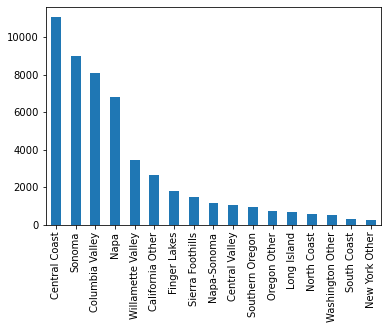

In [15]:
#region_2统计
data_region_2 = winemag_data_130k_v2.iloc[:,6].dropna()
#进行频数统计
region_2_count = data_region_2.value_counts()
print(region_2_count)
#数据可视化
region_2_count.plot.bar()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64


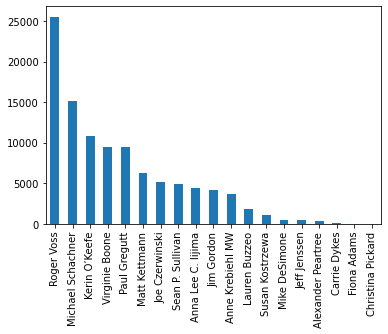

In [16]:
#taster_name统计
data_taster_name = winemag_data_130k_v2.iloc[:,7].dropna()
#进行频数统计
taster_name_count = data_taster_name.value_counts()
print(taster_name_count)
#数据可视化
taster_name_count.plot.bar()

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64


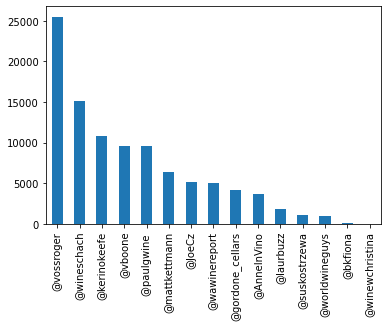

In [17]:
#taster_twitter_handle统计
data_taster_twitter_handle = winemag_data_130k_v2.iloc[:,8].dropna()
#进行频数统计
taster_twitter_handle_count = data_taster_twitter_handle.value_counts()
print(taster_twitter_handle_count)
#数据可视化
taster_twitter_handle_count.plot.bar()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                                   11
Korbel NV Brut Sparkling (California)                                                     9
Segura Viudas NV Extra Dry Sparkling (Cava)                                               8
Ruinart NV Brut Rosé  (Champagne)                                                         7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                                   7
                                                                                         ..
Château de Corbiac 2008  Pécharmant                                                       1
Quevedo 2014 Oscar's Red (Douro)                                                          1
Standing Stone 2014 Ice Riesling (Finger Lakes)                                           1
Casas del Toqui 2009 Terroir Selection Gran Reserva Cabernet Sauvignon (Maipo Valley)     1
Naked Mountain 2009 Barrel Fermented Chardonnay (Virginia)                      

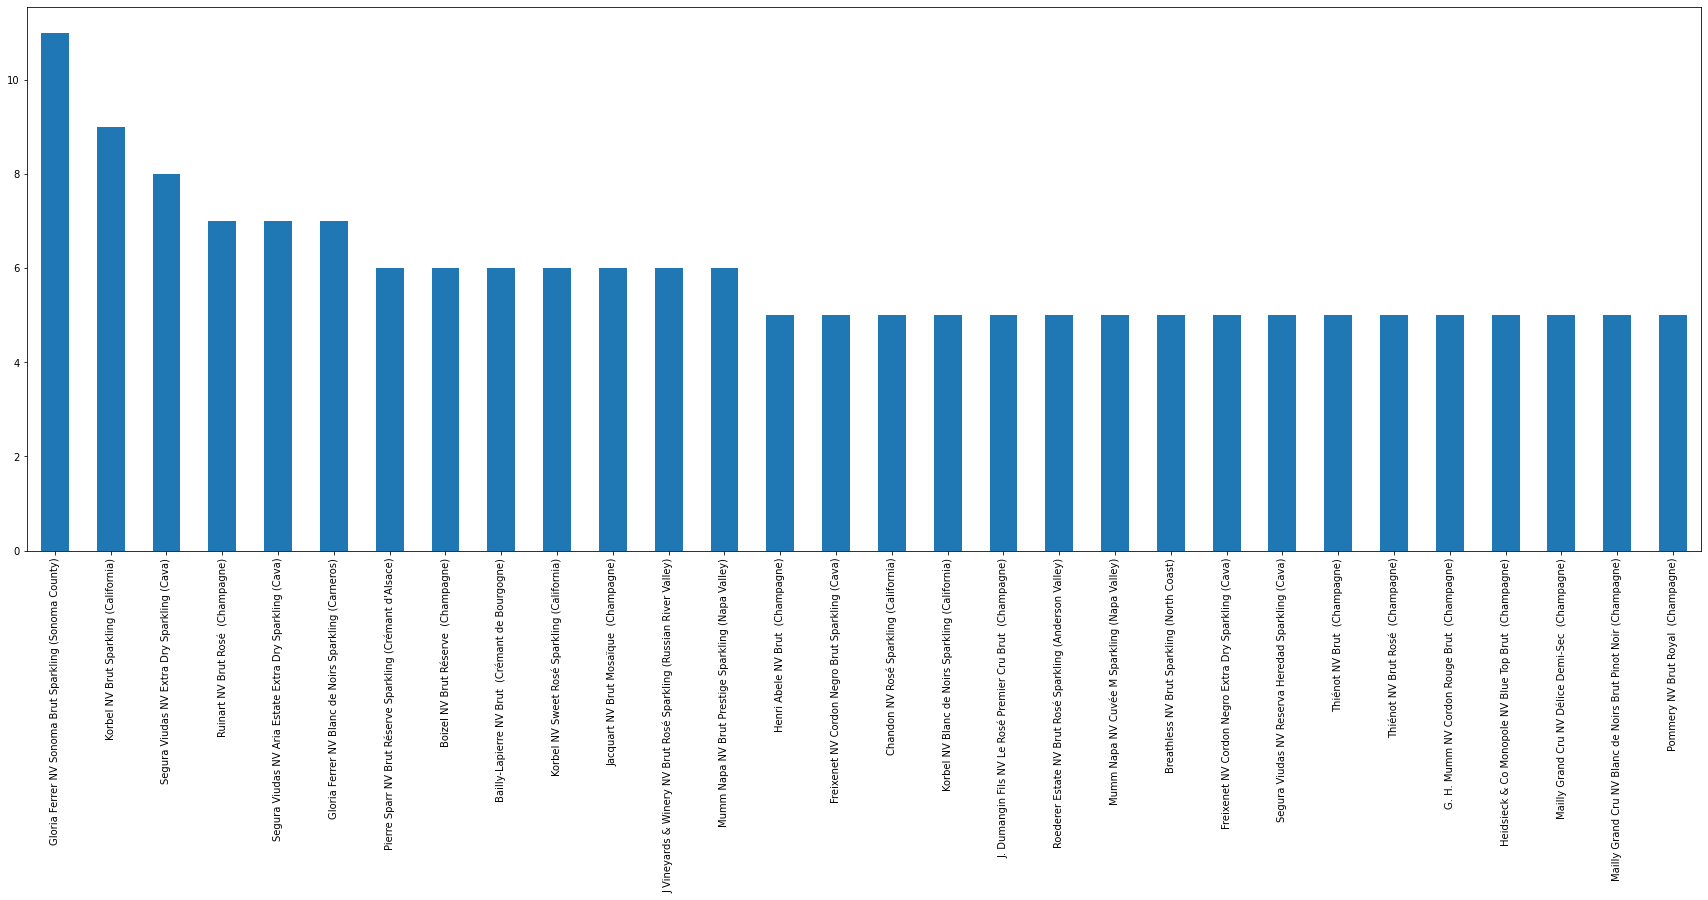

In [24]:
#title统计
data_title = winemag_data_130k_v2.iloc[:,9].dropna()
#进行频数统计
title_count = data_title.value_counts()
print(title_count)
#数据可视化
title_count.head(30).plot.bar(figsize=(30,10))

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Shiraz-Roussanne                1
Tintilia                        1
Colorino                        1
Cercial                         1
Cococciola                      1
Name: variety, Length: 707, dtype: int64


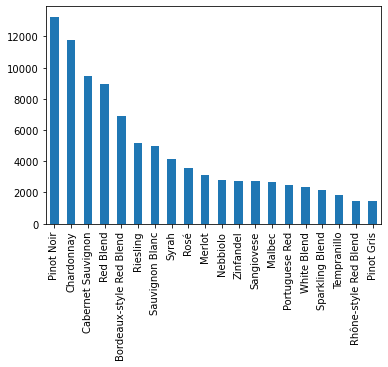

In [25]:
#variety统计
data_variety = winemag_data_130k_v2.iloc[:,10].dropna()
#进行频数统计
variety_count = data_variety.value_counts()
print(variety_count)
#统计出现频率前20的数据,并可视化
variety_count.head(20).plot.bar()

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Wicks                   1
Sierra Moon             1
Besitos                 1
Obsession               1
Château Marbuzet        1
Name: winery, Length: 16757, dtype: int64


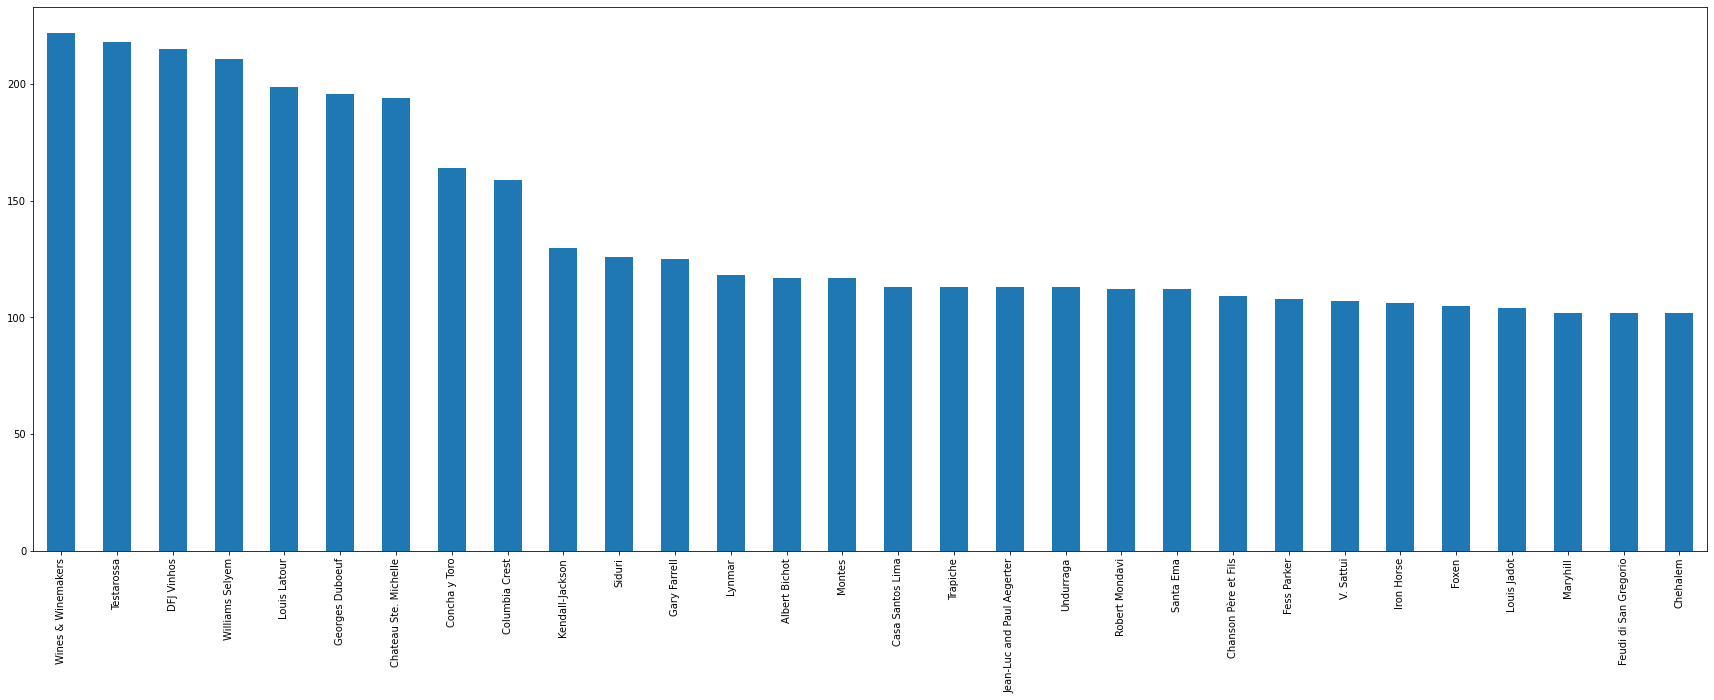

In [26]:
#winery统计
data_winery = winemag_data_130k_v2.iloc[:,11].dropna()
#进行频数统计
winery_count = data_winery.value_counts()
print(winery_count)
#统计出现频率前30的数据,并可视化
winery_count.head(30).plot.bar(figsize=(30,10))

### 数值属性

#### 数值属性的数据概括

In [27]:
data_describe = winemag_data_130k_v2.describe()
data_describe

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### 五数概括
    points：
        - 最小值：80
        - 最大值：100
        - 四分位数（Q1）：86
        - 中位数：88
        - 四分位数（Q3）：91
    price：
        - 最小值：4
        - 最大值：3300
        - 四分位数（Q1）：17
        - 中位数：25
        - 四分位数（Q3）：42

### 缺失值统计

In [28]:
data_points = winemag_data_130k_v2.iloc[:,2]
data_price = winemag_data_130k_v2.iloc[:,3]
print("points missing value:",data_points.isnull().sum())
print("price missing value:",data_price.isnull().sum())

points missing value: 0
price missing value: 8996


## 数据可视化

### 直方图的绘制

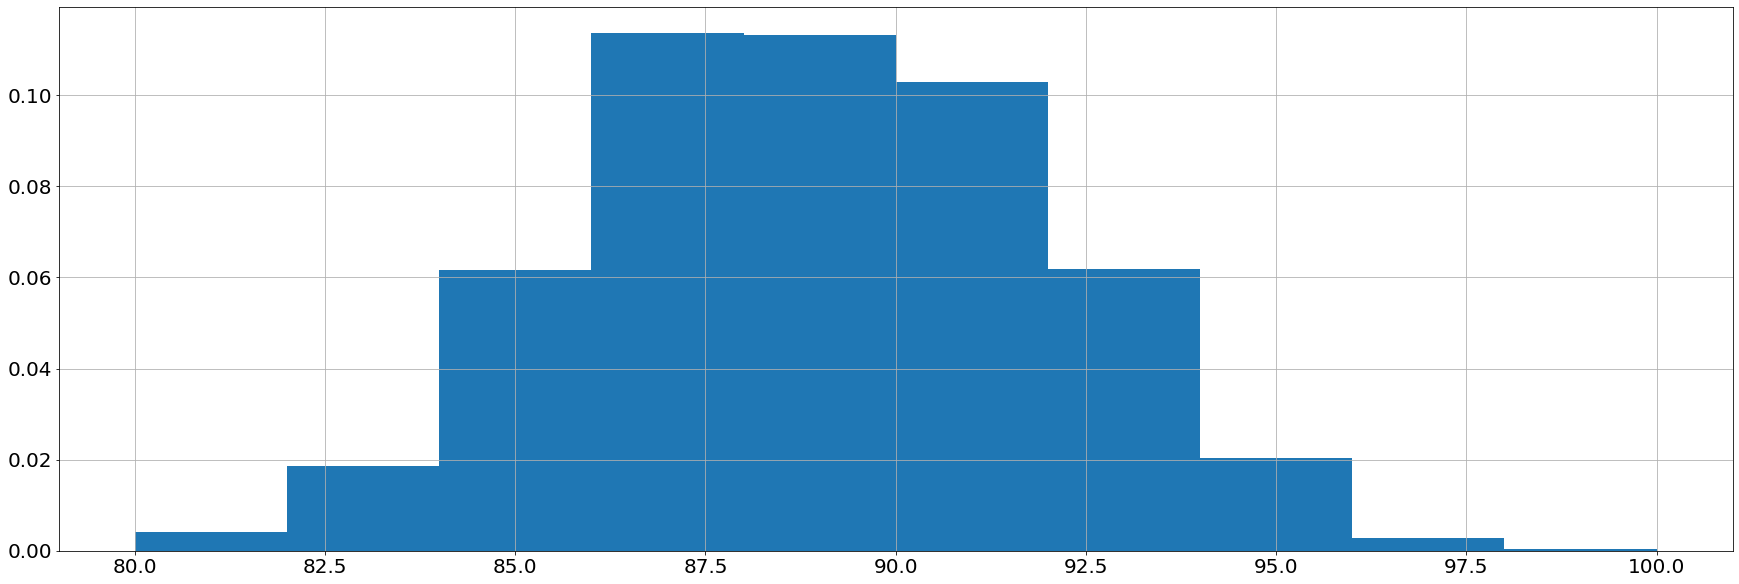

In [29]:
#绘制points直方图
data_points.hist(xlabelsize=20,ylabelsize=20,figsize=(30,10),density=True)

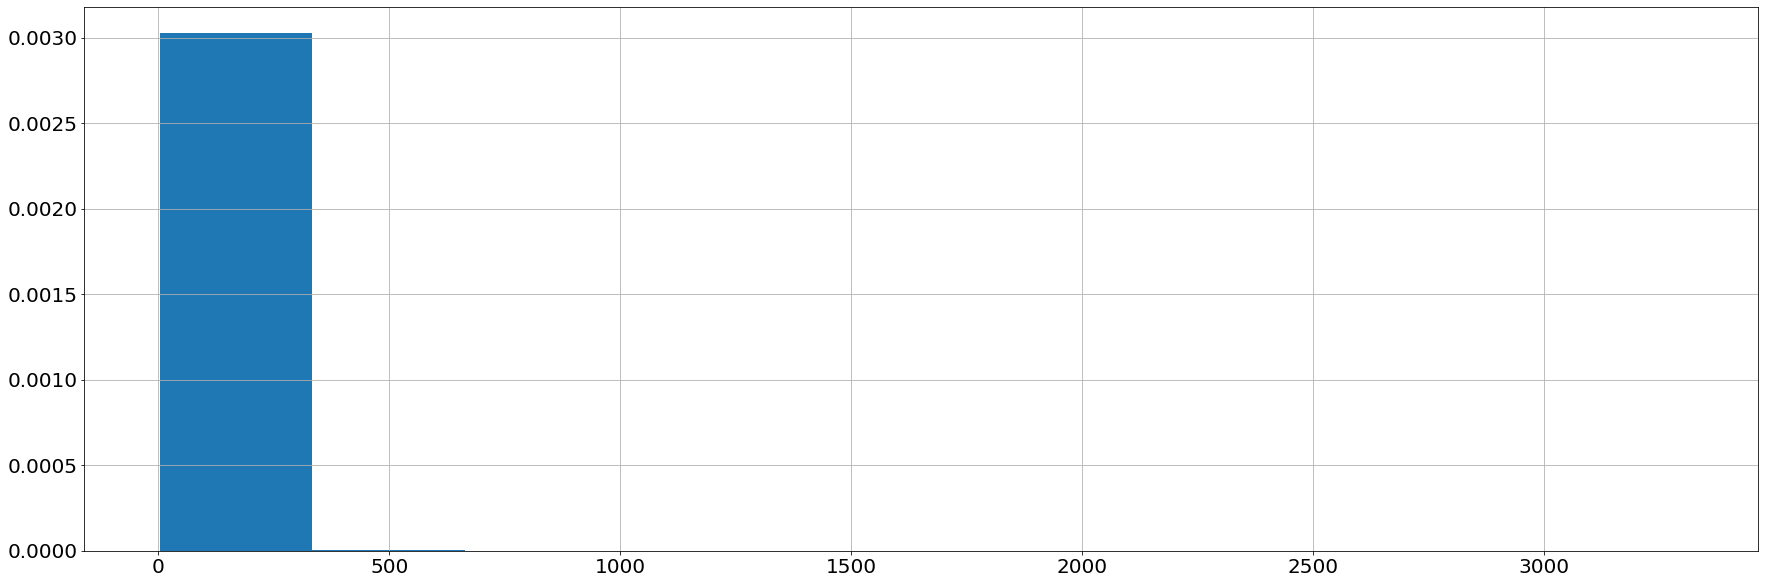

In [30]:
#绘制price直方图
data_price.dropna().hist(xlabelsize=20,ylabelsize=20,figsize=(30,10),density=True)

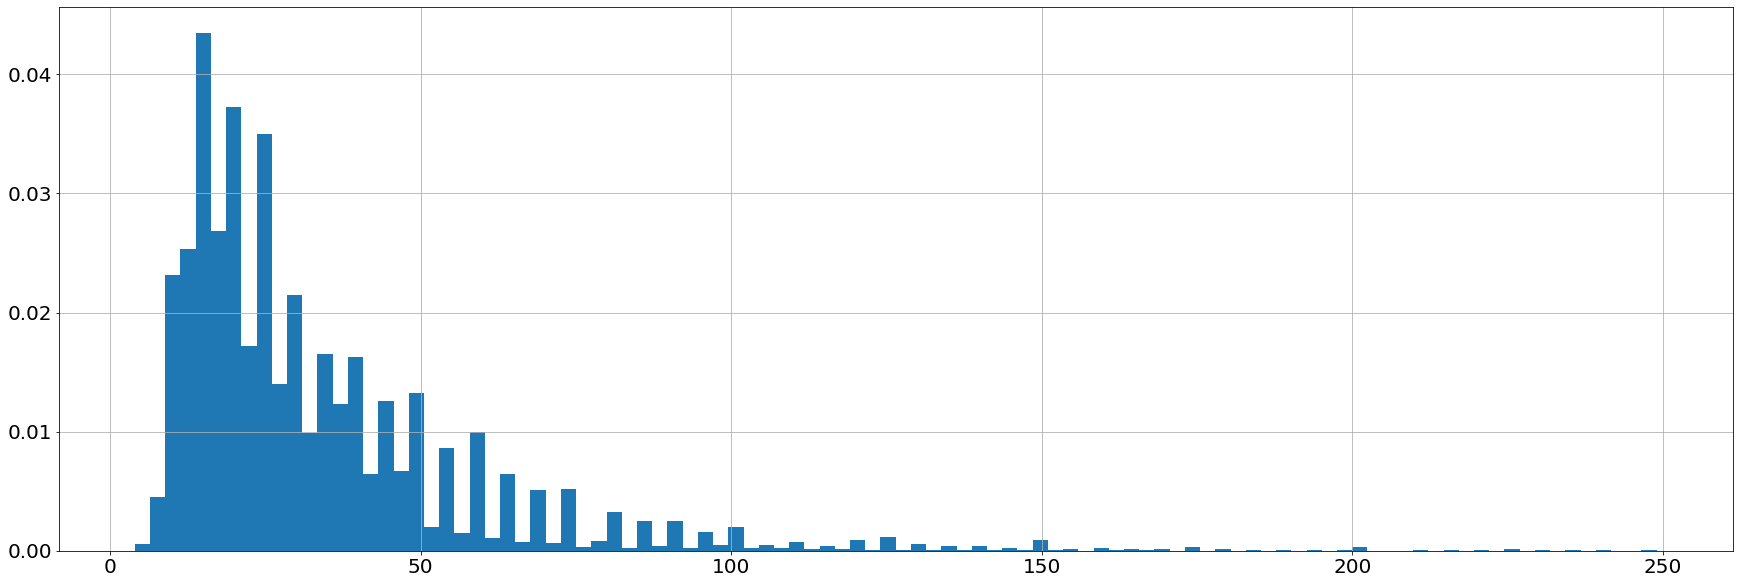

In [31]:
#由上图可知,价格大概分布在0-250之间,因此主要绘制价格<250的数据
data_price_litter = data_price.dropna()[data_price < 250]
data_price_litter.hist(xlabelsize=20,ylabelsize=20,figsize=(30,10),bins=100,density=True)

### 盒图的绘制

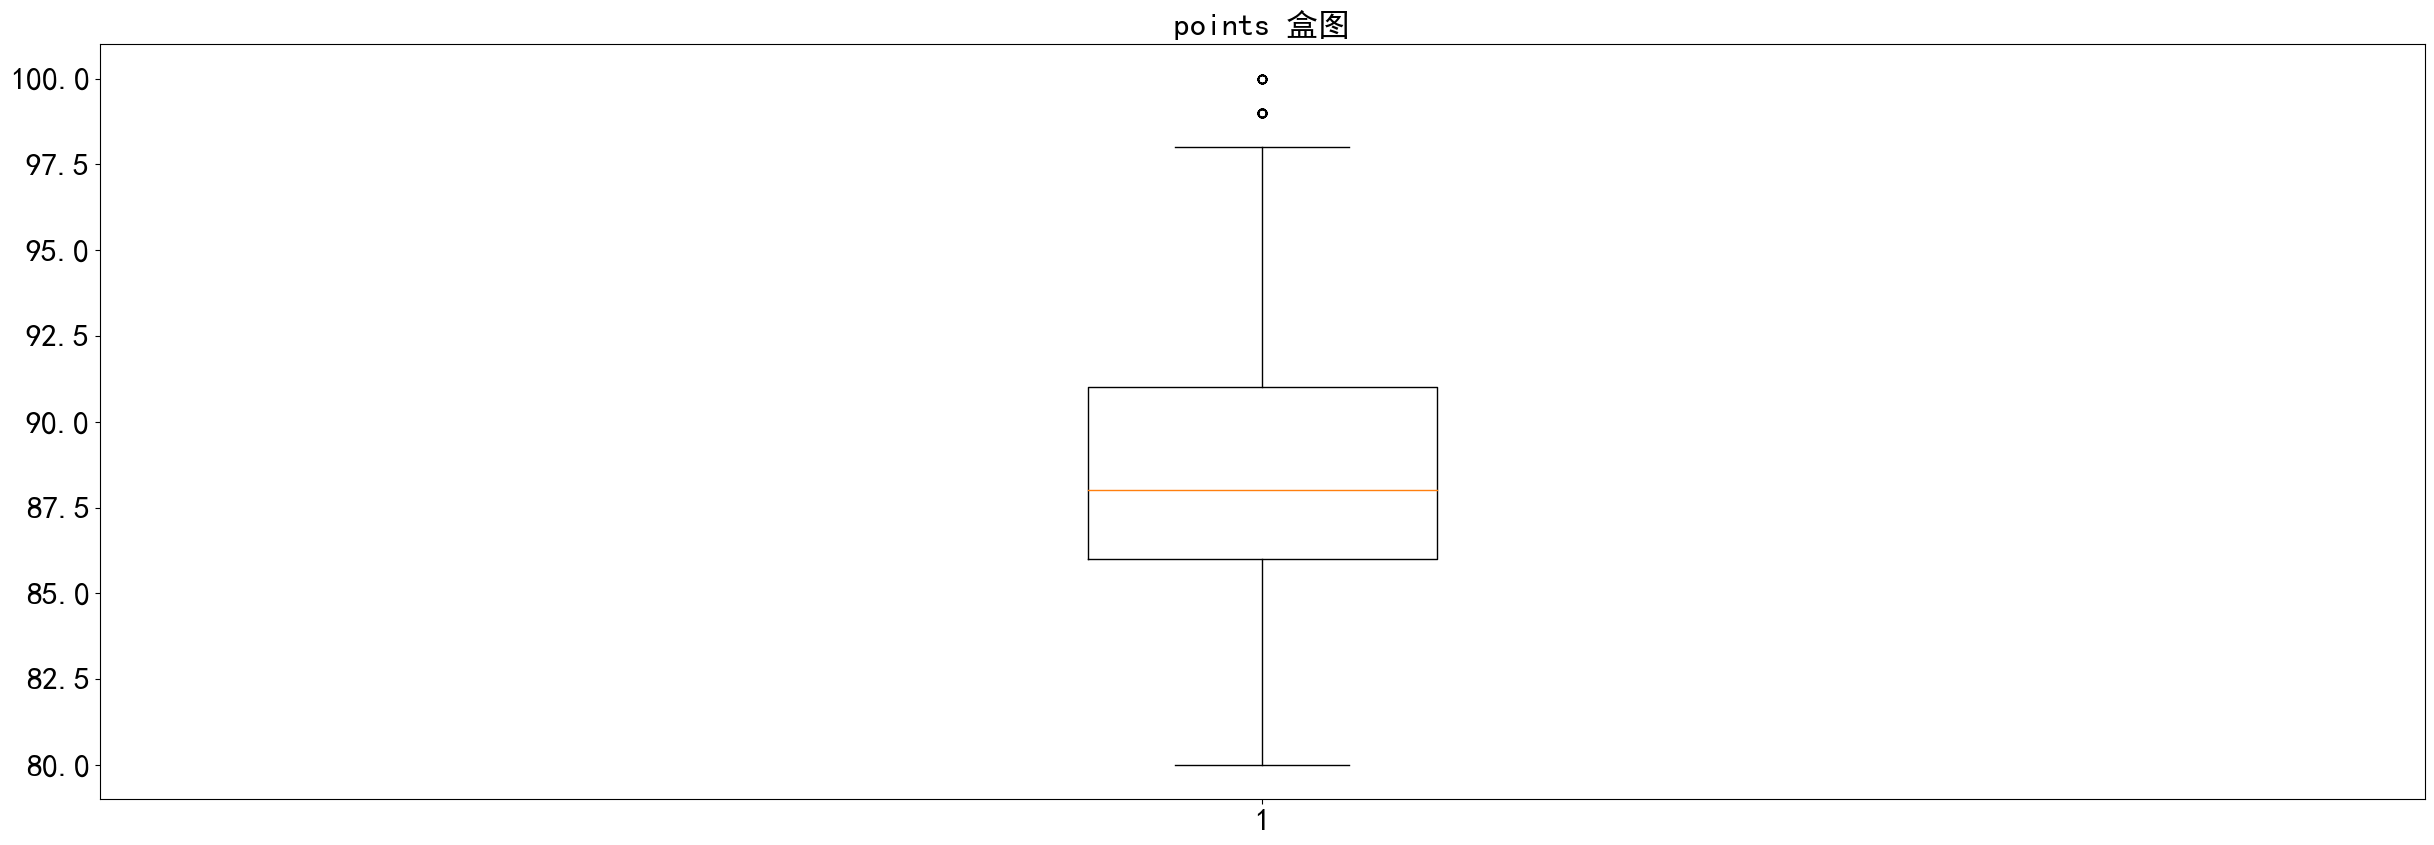

In [32]:
%matplotlib inline

#解决中文乱码问题!
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
#points盒图绘制
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(30,10),dpi=100)
ax.boxplot(data_points.dropna(),notch=False,vert=True)
ax.tick_params(labelsize=23)
ax.set_title('points 盒图',fontsize=23)
plt.show()

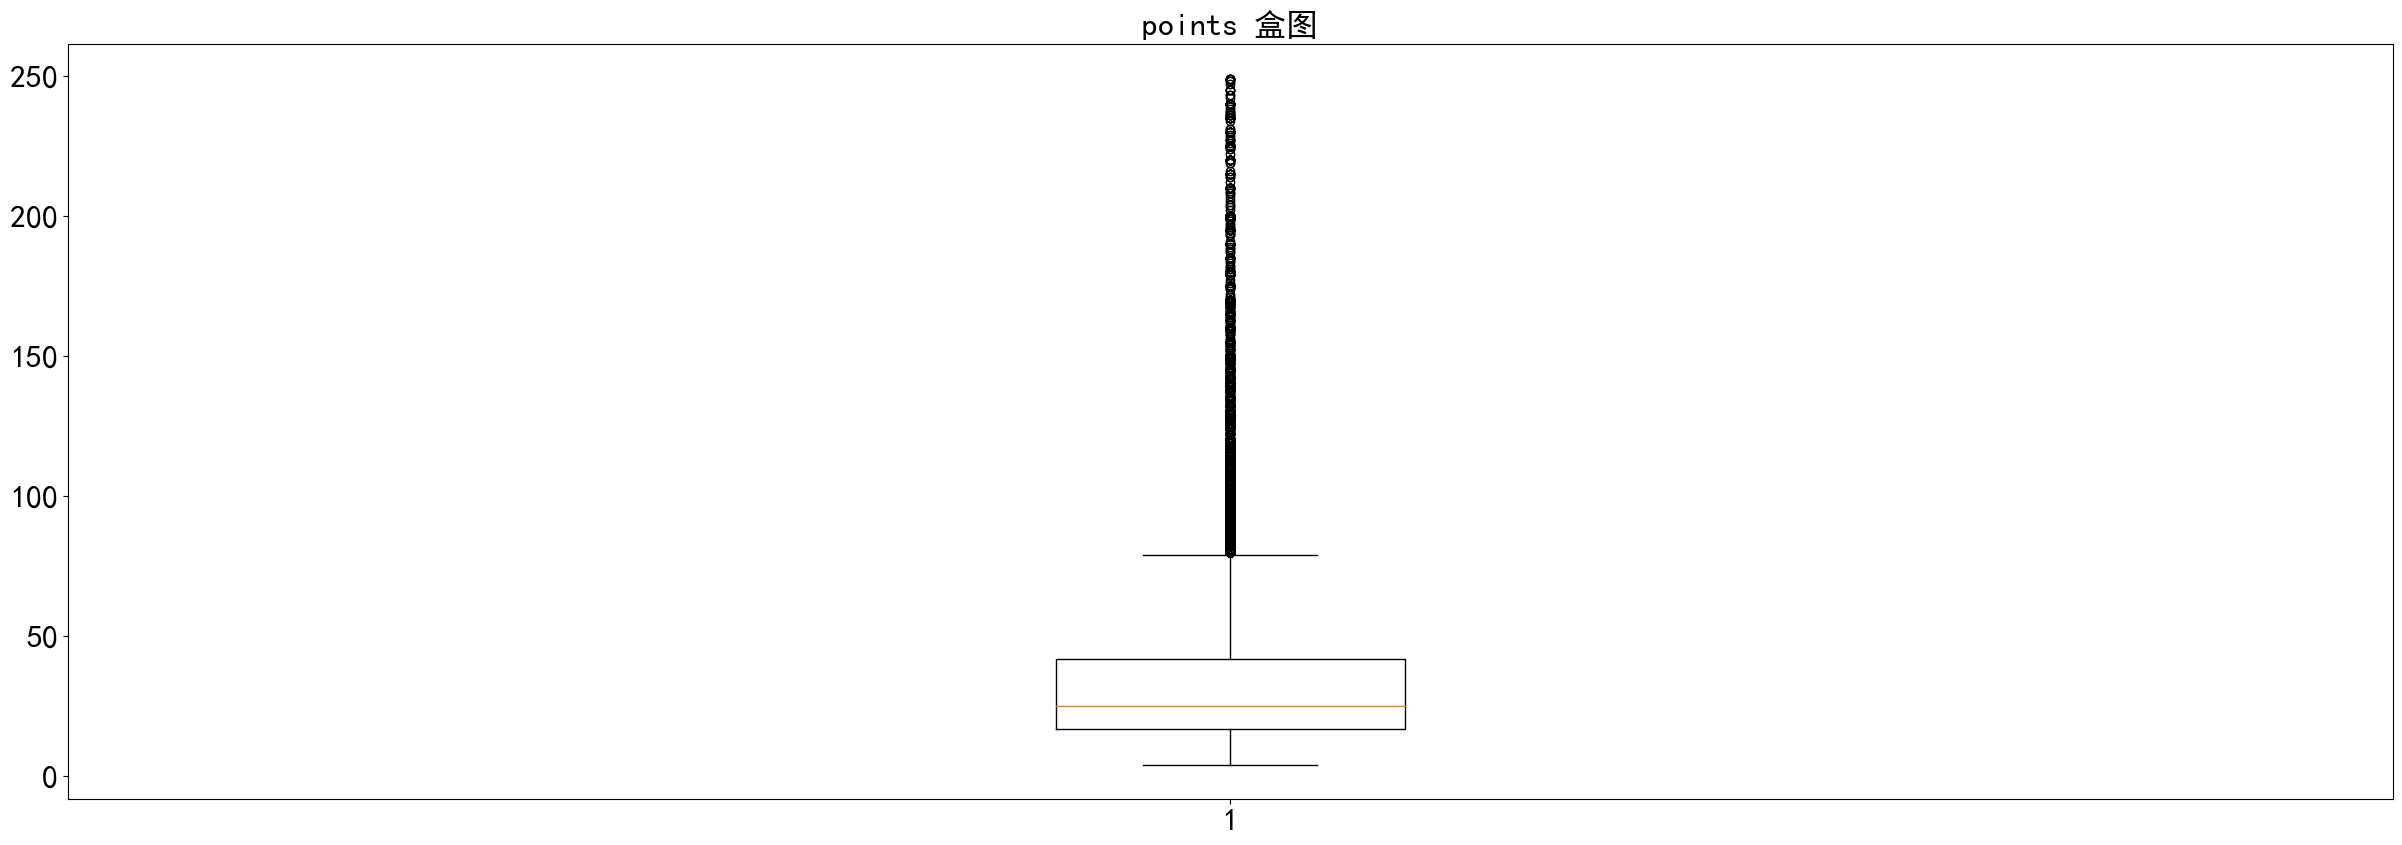

In [33]:
#绘制price盒图
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(30,10),dpi=100)
ax.boxplot(data_price_litter,notch=False,vert=True)
ax.tick_params(labelsize=23)
ax.set_title('points 盒图',fontsize=23)
plt.show()

## 缺失值处理

### 剔除缺失值

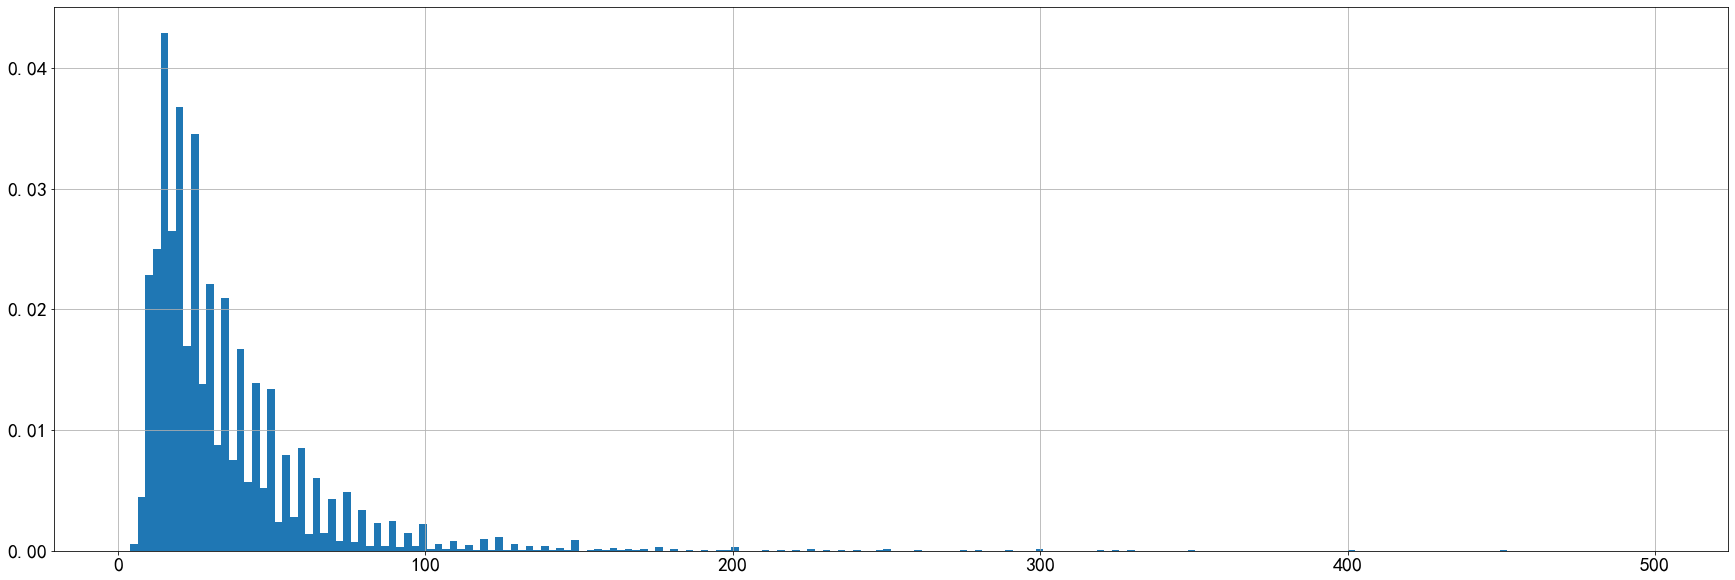

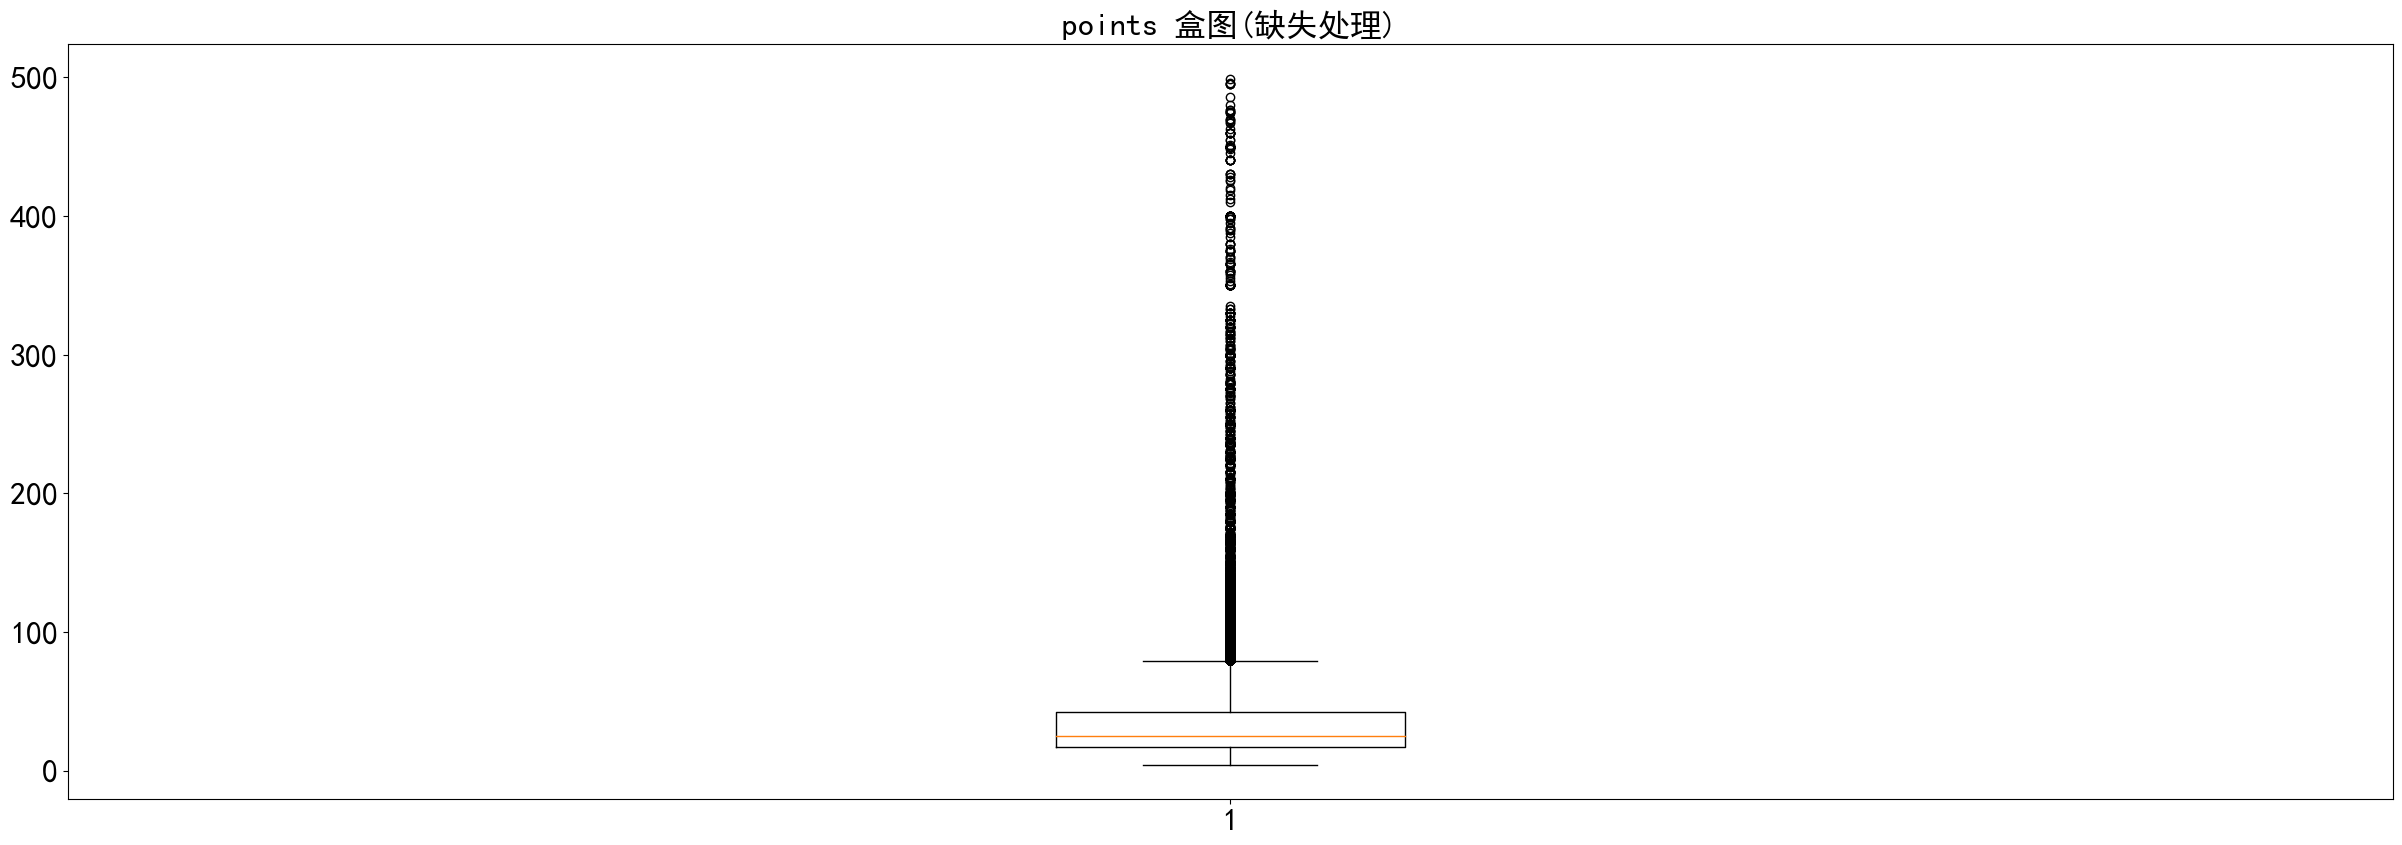

In [34]:
data_price_delete = data_price.dropna()
data_price_delete[data_price_delete<500].hist(xlabelsize=20,ylabelsize=20,figsize=(30,10),bins=200,density=True)
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(30,10),dpi=100)
ax.boxplot(data_price_delete[data_price_delete<500],notch=False,vert=True)
ax.tick_params(labelsize=23)
ax.set_title('points 盒图(缺失处理)',fontsize=23)
plt.show()

### 用最高频率值来填补缺失值

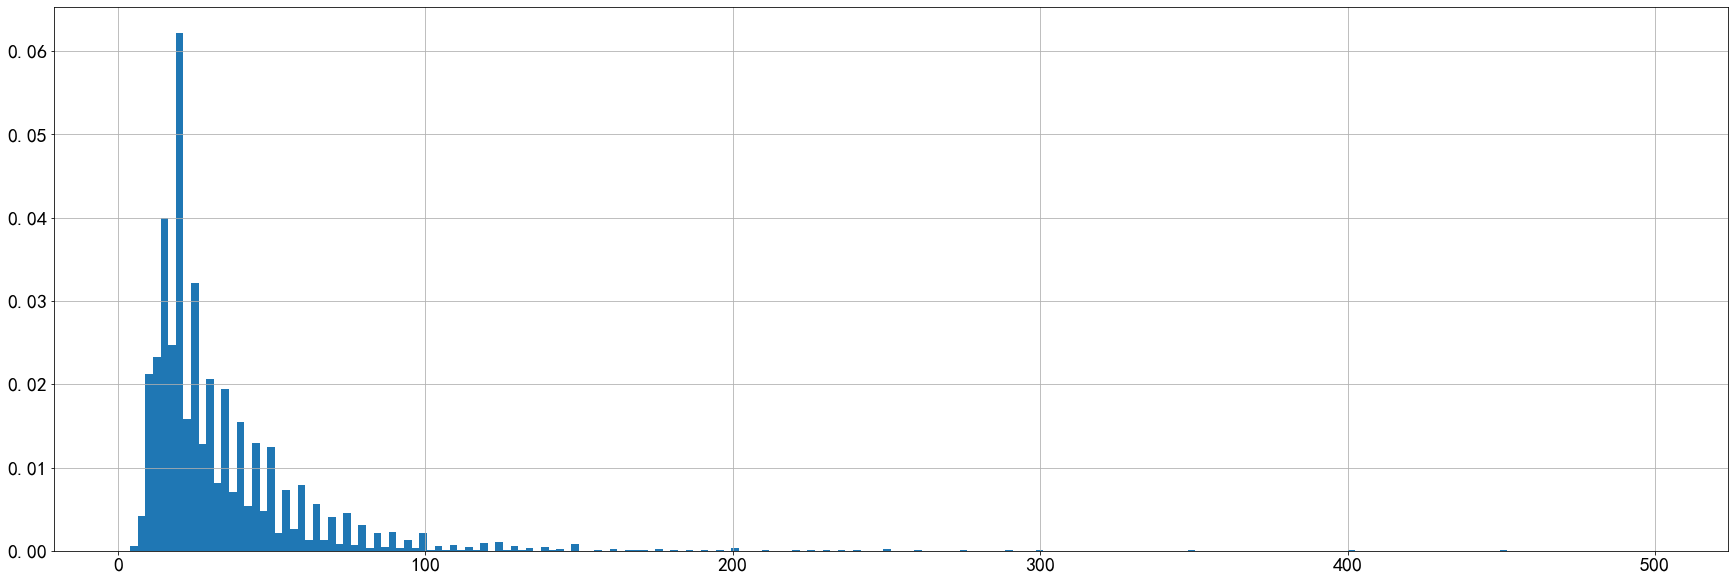

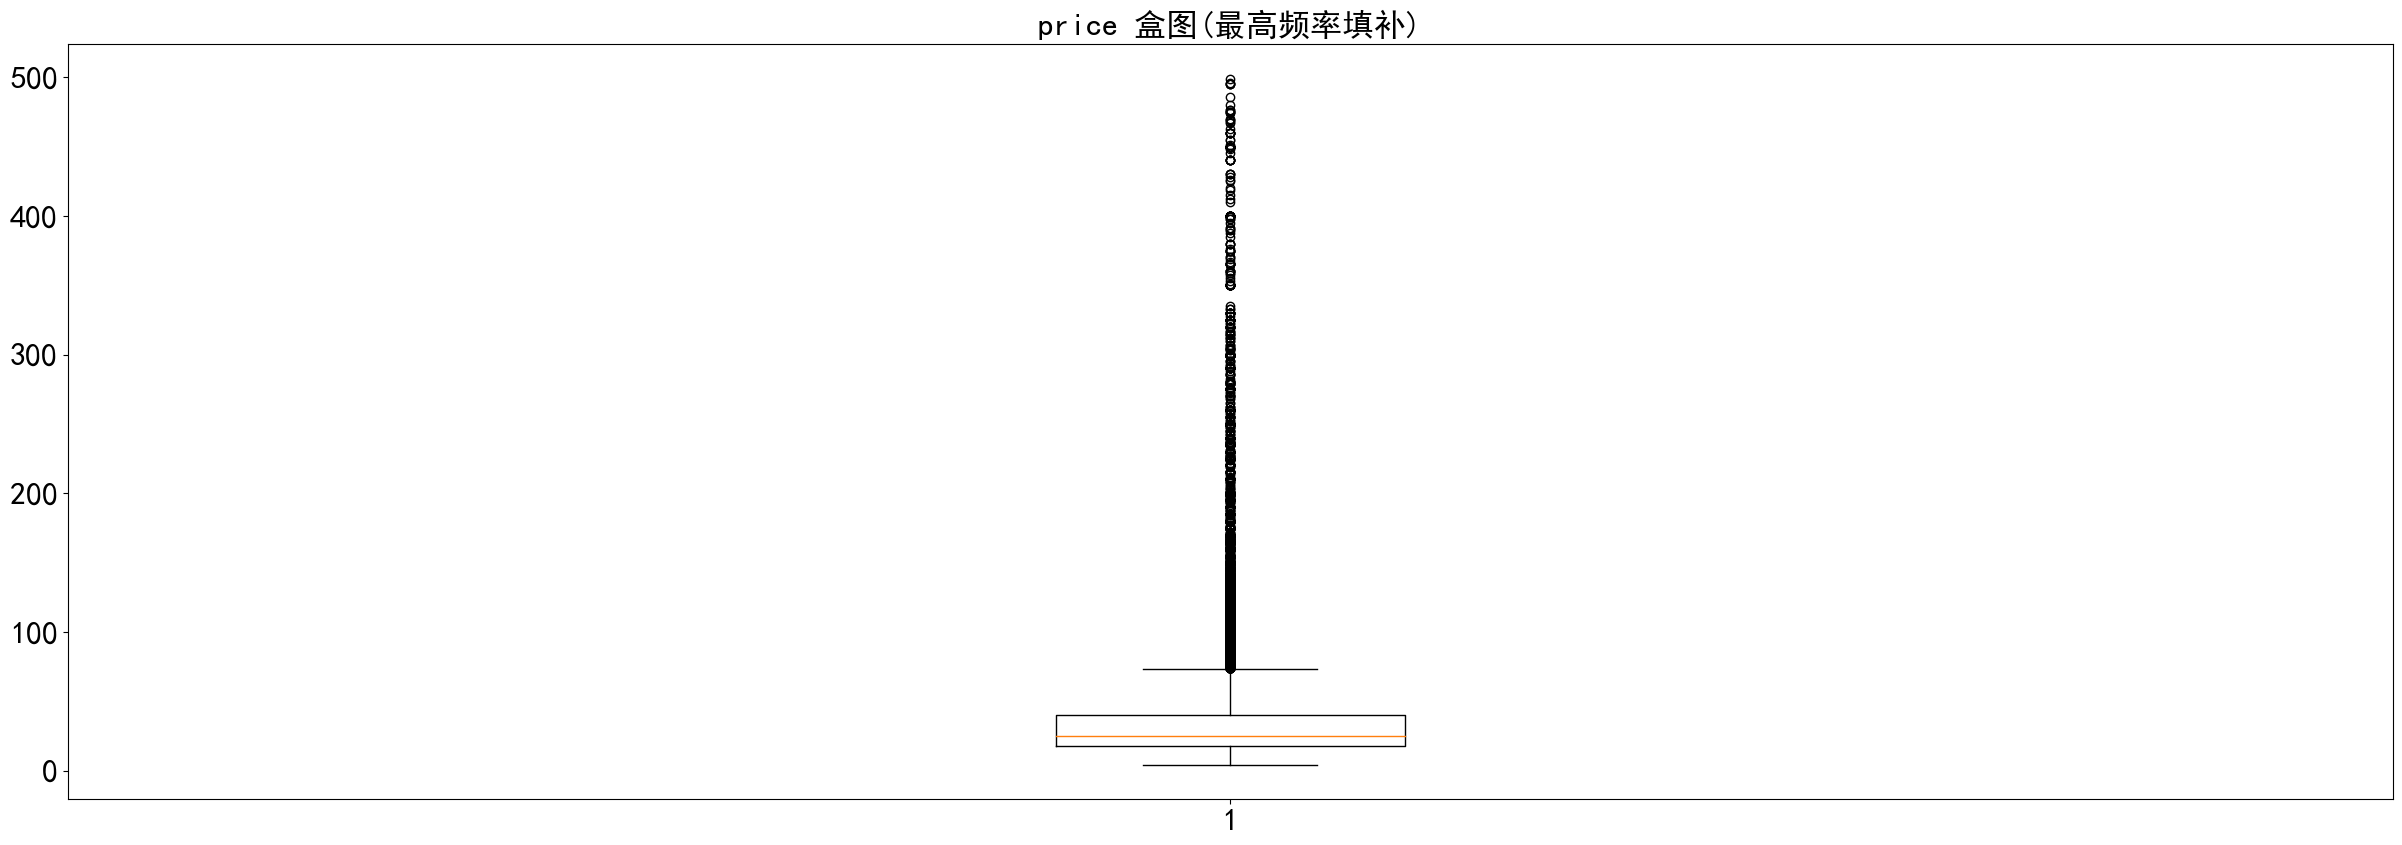

In [35]:
temp = data_price.mode()[0]
data_price_most = data_price.fillna(temp)
data_price_most[data_price_most<500].hist(xlabelsize=20,ylabelsize=20,figsize=(30,10),bins=200,density=True)
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(30,10),dpi=100)
ax.boxplot(data_price_most[data_price_most<500],notch=False,vert=True)
ax.tick_params(labelsize=23)
ax.set_title('price 盒图(最高频率填补)',fontsize=23)
plt.show()

### 通过属性的相关关系来填补缺失值

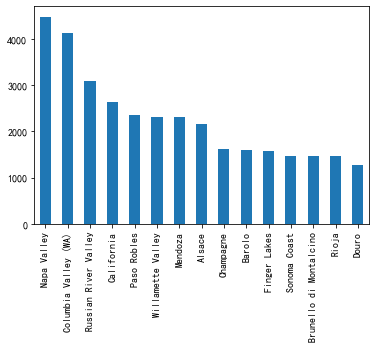

In [40]:
data_region_1_relation = winemag_data_130k_v2.iloc[:,5]
data_province_list = winemag_data_130k_v2.iloc[:,4]
for i in data_region_1_relation.index:
    if data_region_1_relation.loc[i] is np.nan:
        data_region_1_relation.loc[i] = data_province_list.loc[i]
data_region_1_relation.value_counts().head(15).plot.bar()

### 通过数据对象之间的相似性来填补缺失值

In [42]:
pricetemp = {}
data_points_temp = winemag_data_130k_v2.iloc[:,2]
data_price_temp = winemag_data_130k_v2.iloc[:,3]
for i in data_points_temp.index:
    if np.isnan(data_price_temp[i]) == False:
        if data_points_temp[i] in pricetemp:
            pricetemp[data_points_temp[i]].append(data_price_temp[i])
        else :
            pricetemp[data_points_temp[i]] = [data_price_temp[i]]
for key,value in pricetemp.items():
    pricetemp[key] = np.mean(value)

In [45]:
data_price = winemag_data_130k_v2.iloc[:,3]
for i in data_price.index:
    if np.isnan(data_price[i]) == True:
        data_price[i] = pricetemp[data_points_temp[i]]

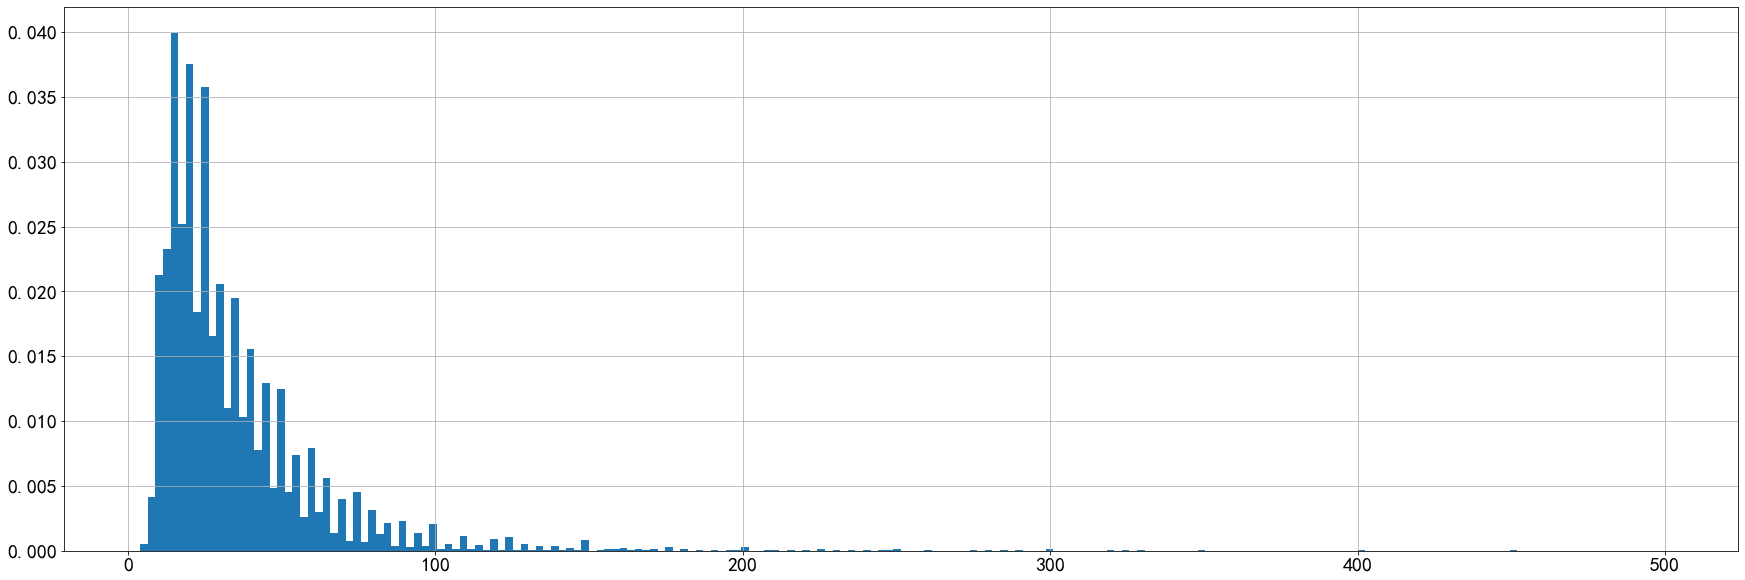

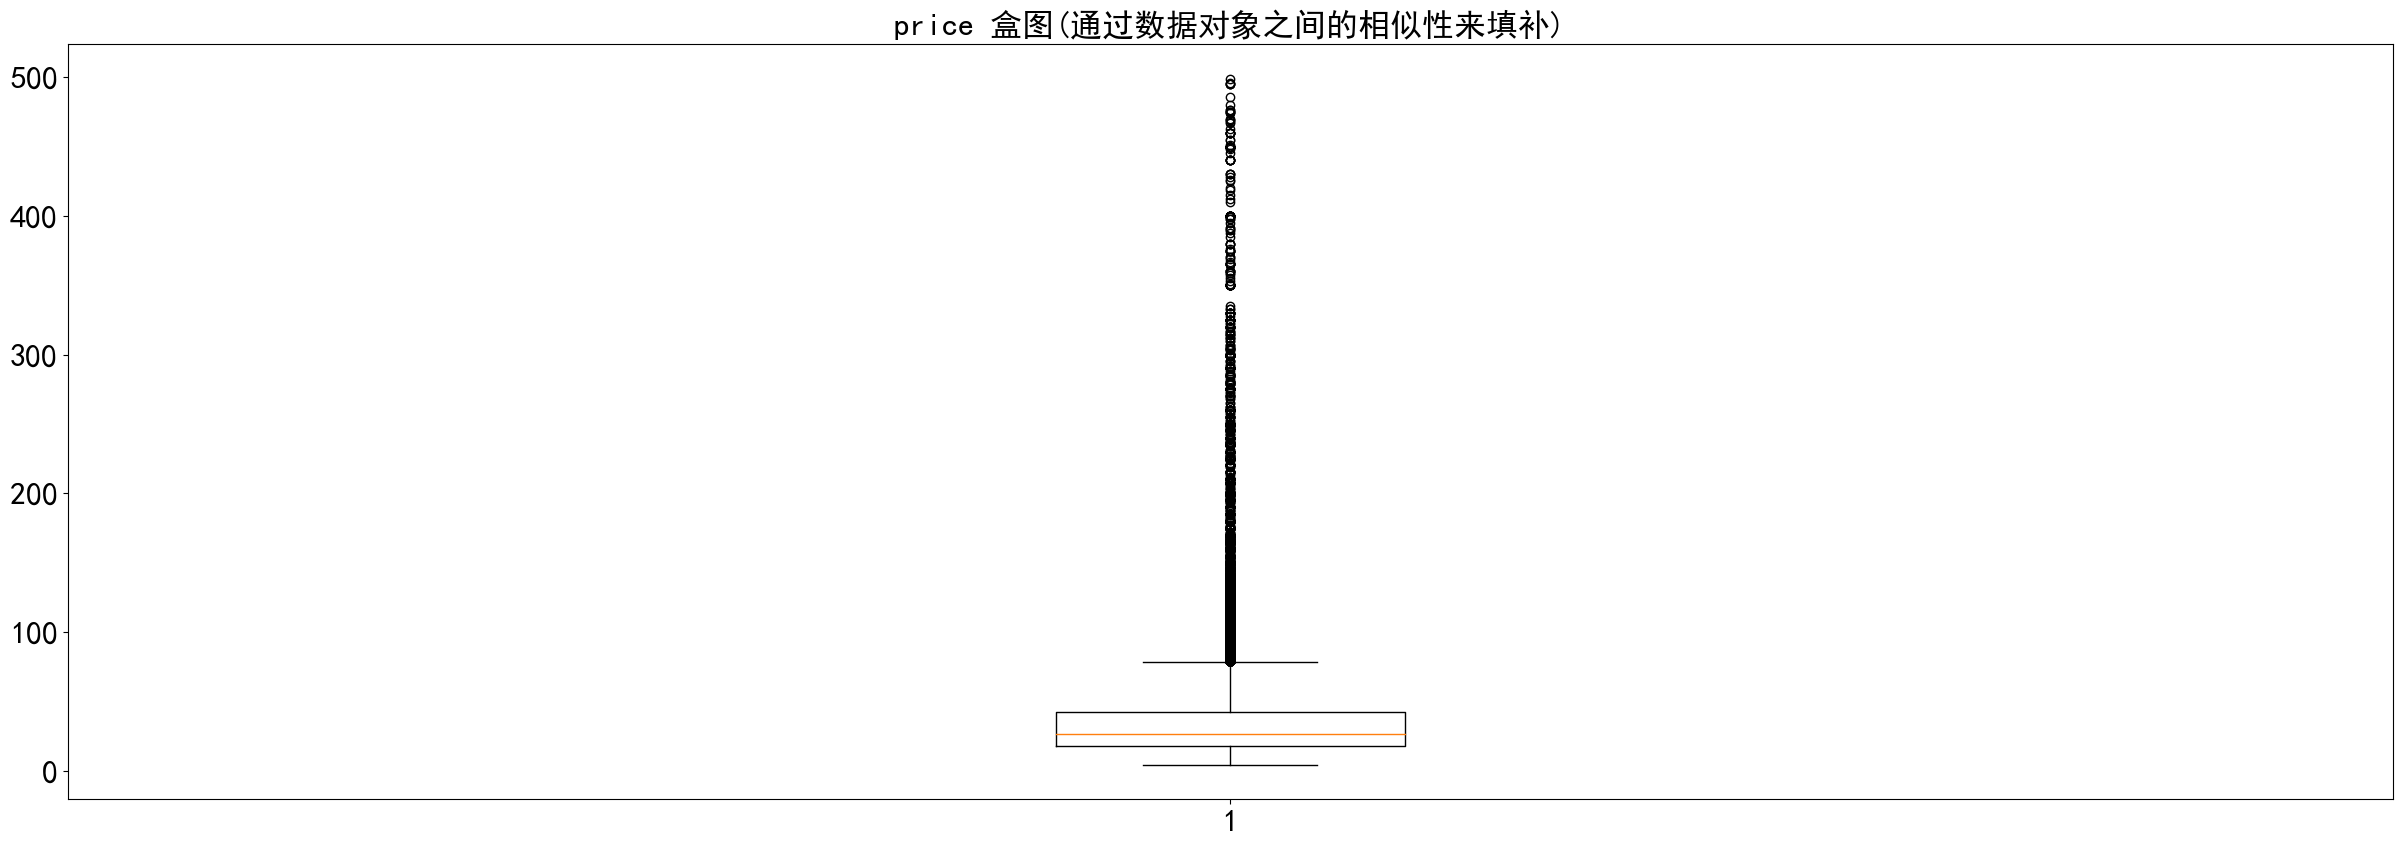

In [46]:
%matplotlib inline

#解决中文乱码问题!
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
data_price[data_price<500].hist(xlabelsize=20,ylabelsize=20,figsize=(30,10),bins=200,density=True)
figure,ax = plt.subplots(nrows=1,ncols=1,figsize=(30,10),dpi=100)
ax.boxplot(data_price[data_price<500],notch=False,vert=True)
ax.tick_params(labelsize=23)
ax.set_title('price 盒图(通过数据对象之间的相似性来填补)',fontsize=23)
plt.show()